# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
#import os
#os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
#!python -m pip install -r requirements.txt
#!pip install -r /kaggle/input/requirements/requirements.txt

## Imports

In [3]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
# Define transforms
## YOUR CODE HERE ##
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

# Create training set and define training dataloader
## YOUR CODE HERE ##
train_set = torchvision.datasets.MNIST(root = "~/.MYpytporch/MNIST_data", train = True, download=True, transform=transform)
test_set = torchvision.datasets.MNIST(root = "~/.MYpytporch/MNIST_data", train = True, download=False, transform=transform)

# Create test set and define test dataloader
## YOUR CODE HERE ##
train_loader = torch.utils.data.DataLoader(train_set, batch_size=250, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=250)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

I chose the transforms based on the requirements of the task and the characteristics of the dataset. For example, if I was working with an image classification task using the MNIST dataset, I might use `transforms.ToTensor()` to convert the image data into PyTorch tensors, which is the required format for training neural networks. Additionally, I use `transforms.Normalize()` to normalize the pixel values of the images to have a mean of 0.5 and a standard deviation of 0.5, which can help improve training stability and convergence.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [5]:
train_data = train_set.data
train_labels = train_set.targets
print("Training Data info:")
print("Size is:", len(train_data))
print("Shape ...", train_data.shape)
print("Label Size:", len(train_labels))
print("Label Shape ...", train_labels.shape)

print()

test_data = test_set.data
test_labels = test_set.targets
print("Testing Data info:")
print("Size is:", len(test_data))
print("Shape ...", test_data.shape)
print("Label Size:", len(test_labels))
print("Label Shape ...", test_labels.shape)

Training Data info:
Size is: 60000
Shape ... torch.Size([60000, 28, 28])
Label Size: 60000
Label Shape ... torch.Size([60000])

Testing Data info:
Size is: 60000
Shape ... torch.Size([60000, 28, 28])
Label Size: 60000
Label Shape ... torch.Size([60000])


In [6]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

9


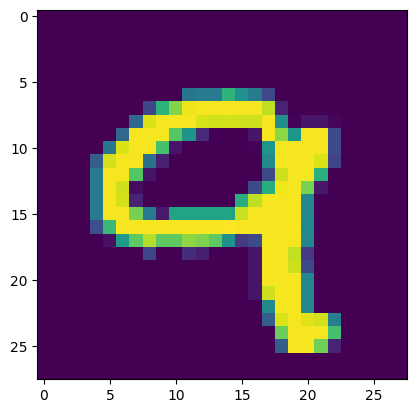

3


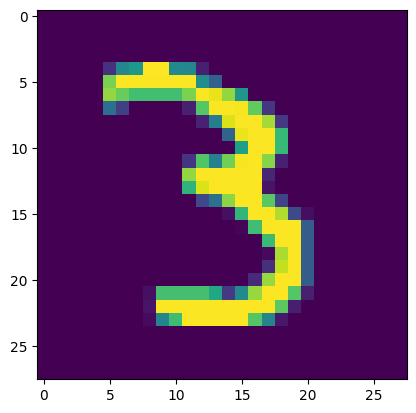

8


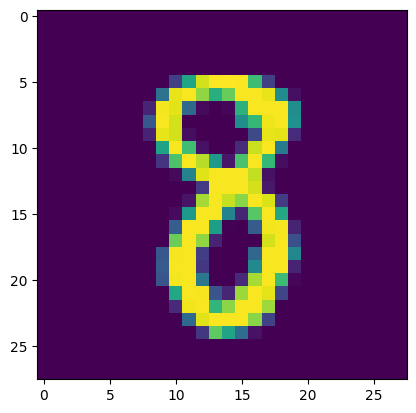

7


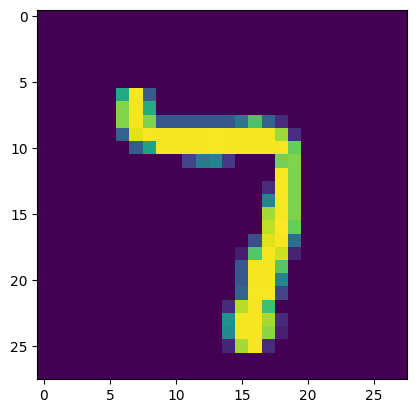

6


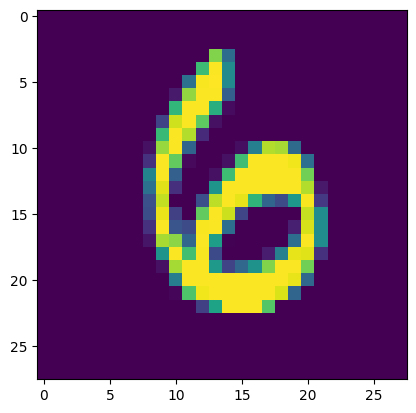

In [7]:
# Explore data
## YOUR CODE HERE ##
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [8]:
## YOUR CODE HERE ##
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = nn.Sigmoid()
        self.fc1 = nn.Linear(28*28, 100)
        self.fc2 = nn.Linear(100, 54)
        self.fc3 = nn.Linear(54, 10)
        self.dropout = nn.Dropout(0.3)
        self.log_softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.activation(self.fc2(x))
        x = self.dropout(x)
        raw_scores = self.fc3(x)
        log_probs = self.log_softmax(raw_scores)
        
        return raw_scores, log_probs
    
model = Model()

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [9]:
## YOUR CODE HERE ##
optimizer = optim.Adam(model.parameters(), lr = 0.005)
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [10]:
## YOUR CODE HERE ##
def train_validation(model , train_loader,test_loader, criterion, optimizer, num_epoch= 10):
    if torch.cuda.is_available():
        model = model.to("cuda") 
    train_loss_hist = list()
    val_loss_hist = list()
    train_acc_hist = list()
    val_acc_hist = list()
    
    for epoch in range(num_epoch):
        train_loss = 0.0
        train_acc = 0
        model.train()
        
        for i, data in enumerate(train_loader):
            inputs, labels = data
            # Pass to GPU if available.
            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()
            optimizer.zero_grad()
            outputs, log_ps = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            _, preds = torch.max(outputs.data, 1)
            train_acc += torch.eq(preds, labels).sum().item()
            train_loss += loss.item()
            
        train_accuracy = 100*train_acc/len(train_loader.dataset)
        train_losses = train_loss / len(train_loader.dataset)
        
        train_loss_hist.append(train_losses)
        train_acc_hist.append(train_accuracy)
        print(f"Epoch {epoch +1} <-> Training Accuracy: {train_accuracy:.2f}% || Training Loss: {train_losses:.5f}")
        
        val_loss = 0.0
        val_acc = 0
        model.eval()
        
        with torch.no_grad():
            for inputs, labels in test_loader:
                if torch.cuda.is_available():
                    inputs, labels = inputs.cuda(), labels.cuda()
                outputs, log_ps = model(inputs)
                loss = criterion(outputs, labels)
                
                _ , preds = torch.max(outputs.data, 1)
                val_acc += torch.eq(preds, labels).sum().item()
                val_loss += loss.item()
                
            val_accuracy = 100 * val_acc /len(test_loader.dataset)
            val_losses = val_loss / len(test_loader.dataset)
            
            val_loss_hist.append(val_losses)
            val_acc_hist.append(val_accuracy)
            print(f"Epoch {epoch +1} <-> Validation Accuracy: {val_accuracy:.2f}% || Validation Loss: {val_losses:.5f}")
            
    return train_loss_hist, val_loss_hist, train_acc_hist, val_acc_hist, model
            

In [11]:
train_loss_history, val_loss_history, train_acc_history, val_acc_history, trained_model = train_validation(model , train_loader,test_loader, criterion, optimizer )

Epoch 1 <-> Training Accuracy: 72.71% || Training Loss: 0.00360
Epoch 1 <-> Validation Accuracy: 90.32% || Validation Loss: 0.00134
Epoch 2 <-> Training Accuracy: 88.16% || Training Loss: 0.00166
Epoch 2 <-> Validation Accuracy: 92.71% || Validation Loss: 0.00098
Epoch 3 <-> Training Accuracy: 90.14% || Training Loss: 0.00137
Epoch 3 <-> Validation Accuracy: 93.80% || Validation Loss: 0.00083
Epoch 4 <-> Training Accuracy: 90.73% || Training Loss: 0.00126
Epoch 4 <-> Validation Accuracy: 94.56% || Validation Loss: 0.00073
Epoch 5 <-> Training Accuracy: 91.47% || Training Loss: 0.00117
Epoch 5 <-> Validation Accuracy: 94.89% || Validation Loss: 0.00069
Epoch 6 <-> Training Accuracy: 91.65% || Training Loss: 0.00114
Epoch 6 <-> Validation Accuracy: 95.07% || Validation Loss: 0.00065
Epoch 7 <-> Training Accuracy: 91.78% || Training Loss: 0.00112
Epoch 7 <-> Validation Accuracy: 95.03% || Validation Loss: 0.00065
Epoch 8 <-> Training Accuracy: 92.53% || Training Loss: 0.00103
Epoch 8 <-> 

Plot the training loss (and validation loss/accuracy, if recorded).

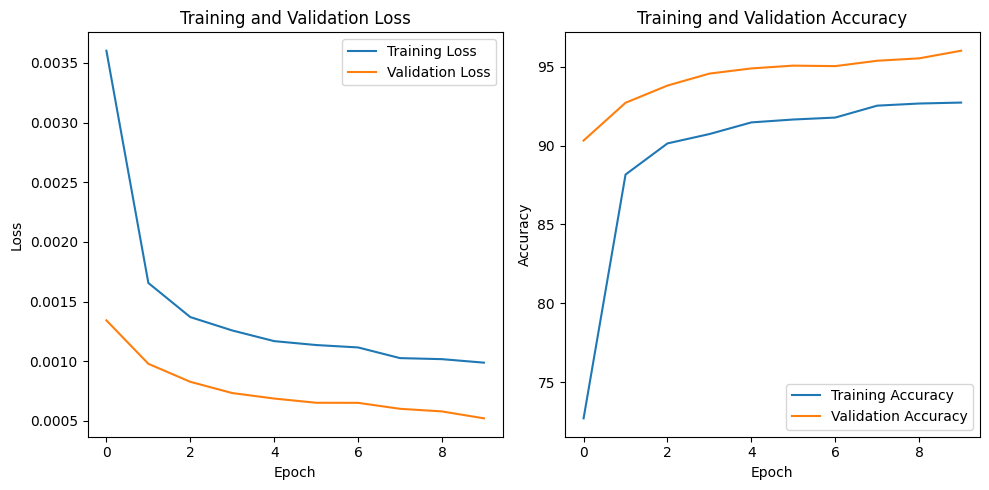

In [12]:
## YOUR CODE HERE ##

# Plot the training and validation loss
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc_history, label="Training Accuracy")
plt.plot(val_acc_history, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [13]:
## YOUR CODE HERE ##
correct_pred = 0

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
            outputs, log_ps = model(inputs)
            loss = criterion(outputs, labels)
                
            _, preds = torch.max(outputs.data, 1)
            correct_pred += torch.eq(preds, labels).sum().item()
            
#Printing accuracy
accuracy = 100 * correct_pred / len(test_loader.dataset)
print(f"Total Acurracy is <-> {accuracy:.2f}%")   

def visualize_probabilities(model, image):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        if torch.cuda.is_available():
            image.cuda()
        raw_scores, log_probs = model(image)
        probabilities = torch.exp(log_probs)[0]  # Convert log probabilities to probabilities
        classes = range(10)  # Assuming there are 10 classes in the dataset

        # Plot the image
        plt.imshow(image.squeeze().cpu(), cmap='gray')  # Move the image tensor to CPU for plotting
        plt.title('Image')
        plt.axis('off')
        plt.show()

        # Plot the probabilities horizontally with pinkish color
        plt.barh(classes, probabilities.cpu(), color='pink')  # Horizontal bar plot with pinkish color
        plt.xlabel('Probability')
        plt.ylabel('Class')
        plt.title('Class Probabilities')
        plt.yticks(classes)
        plt.show()

Total Acurracy is <-> 96.01%


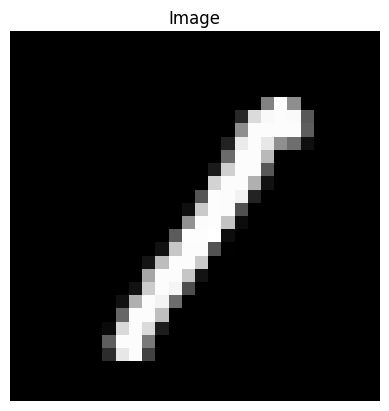

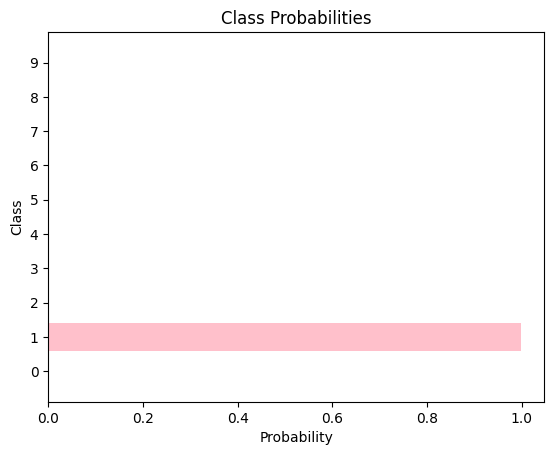

In [14]:
images, labels = next(iter(train_loader))
if torch.cuda.is_available():
    images, labels = inputs.cuda(), labels.cuda()
    
# Flatten the image to pass in the model
img = images[0].view(1, 28, 28)
visualize_probabilities(model, img)

## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [15]:
## YOUR CODE HERE ##
def random_search_adam(train_loader, test_loader, momentum_values):
    best_model = None
    best_val_accuracy = 0.0
    
    for momentum in momentum_values:
        # Create the model, optimizer, and criterion
        model = Model()
        optimizer = optim.Adam(model.parameters(), lr=0.005, betas=(momentum, 0.999))
        criterion = nn.CrossEntropyLoss()
        
        # Train the model and get validation accuracy
        train_loss_hist, val_loss_hist, train_acc_hist, val_acc_hist, trained_model = train_validation(model, train_loader, test_loader, criterion, optimizer)
        val_accuracy = max(val_acc_hist)
        
        print(f"Momentum: {momentum:.5f}, Validation Accuracy: {val_accuracy:.2f}%")
        
        # Update best model if current validation accuracy is higher
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_model = trained_model
        
        print()  # Print an empty line between trials
            
    return best_model

# Define the set of momentum values to loop over
momentum_values = [0.6, 0.7, 0.8, 0.9, 0.95]

# Perform random search for momentum with Adam optimizer
best_model_adam_random = random_search_adam(train_loader, test_loader, momentum_values)

Epoch 1 <-> Training Accuracy: 77.68% || Training Loss: 0.00305
Epoch 1 <-> Validation Accuracy: 91.63% || Validation Loss: 0.00114
Epoch 2 <-> Training Accuracy: 89.87% || Training Loss: 0.00141
Epoch 2 <-> Validation Accuracy: 93.74% || Validation Loss: 0.00084
Epoch 3 <-> Training Accuracy: 91.48% || Training Loss: 0.00119
Epoch 3 <-> Validation Accuracy: 94.69% || Validation Loss: 0.00070
Epoch 4 <-> Training Accuracy: 92.29% || Training Loss: 0.00105
Epoch 4 <-> Validation Accuracy: 95.36% || Validation Loss: 0.00061
Epoch 5 <-> Training Accuracy: 92.75% || Training Loss: 0.00099
Epoch 5 <-> Validation Accuracy: 95.40% || Validation Loss: 0.00059
Epoch 6 <-> Training Accuracy: 93.14% || Training Loss: 0.00093
Epoch 6 <-> Validation Accuracy: 95.99% || Validation Loss: 0.00052
Epoch 7 <-> Training Accuracy: 93.66% || Training Loss: 0.00087
Epoch 7 <-> Validation Accuracy: 96.36% || Validation Loss: 0.00046
Epoch 8 <-> Training Accuracy: 93.74% || Training Loss: 0.00085
Epoch 8 <-> 

In [16]:
correct_pred = 0

best_model_adam_random.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
            outputs, log_ps = best_model_adam_random(inputs)
            loss = criterion(outputs, labels)
                
            _, preds = torch.max(outputs.data, 1)
            correct_pred += torch.eq(preds, labels).sum().item()
            
#Printing accuracy
accuracy = 100 * correct_pred / len(test_loader.dataset)
print(f"Total Acurracy is <-> {accuracy:.2f}%")   

Total Acurracy is <-> 96.72%


## Saving your model
Using `torch.save`, save your model for future loading.

In [17]:
## YOUR CODE HERE ##
torch.save(best_model_adam_random.state_dict(), "model.pth")

In [18]:
model_1 = Model()
model_1.load_state_dict(torch.load("/kaggle/working/model.pth"))

correct_pred = 0

if torch.cuda.is_available():
    model_1 = model_1.to("cuda")
model_1.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
            outputs, log_ps = model_1(inputs)
            loss = criterion(outputs, labels)
                
            _, preds = torch.max(outputs.data, 1)
            correct_pred += torch.eq(preds, labels).sum().item()
            
#Printing accuracy
accuracy = 100 * correct_pred / len(test_loader.dataset)
print(f"Total Acurracy is <-> {accuracy:.2f}%")   

Total Acurracy is <-> 96.72%


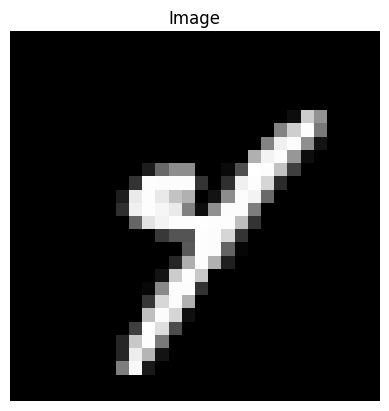

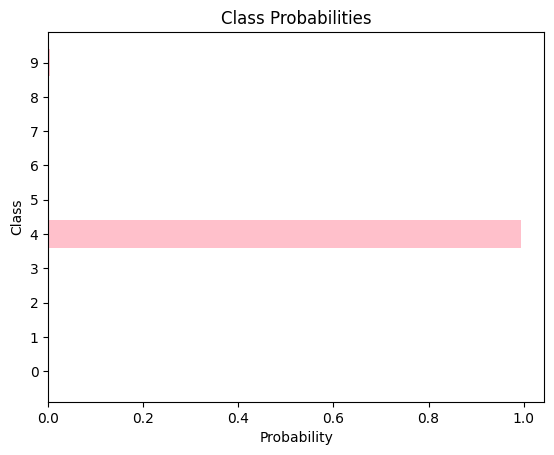

In [19]:
# Flatten the image to pass in the model
img = images[9].view(1, 28, 28)
visualize_probabilities(model_1, img)

**!Nice**